In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [2]:
import collections

In [3]:
# sheet_id = '1X6X5TStKeZiPjJJ_LV500rNRjPpu2GeXjJcGFHyirUs'
# sheet_name = 'Dataset'
# url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTdhDE5-R1NDa0mClErdJKtjTNTiar_PCBq_zT8xNsh--iaswy6_kT11en2EvPsAhODqPR5VTaRJpR1/pub?output=csv"
# #url_1 = url.replace('/edit#gid=', '/export?format=csv&gid=')
# pd.read_csv(url)

In [4]:
df=pd.read_csv('Data-Sheet2.csv',  on_bad_lines='skip')
df

,SN,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/rtrLsaOptions/nssaTranslation,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/doNotAge,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/multitopologyCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/doNotUseInRouteCalc,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/demandCircuitsSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/options/multicastCapability,Attack
0,1,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Attack
1,2,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Attack
2,3,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Attack
3,4,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Attack
4,5,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Attack
5,6,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Attack
6,7,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Not Attack
7,8,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Not Attack
8,9,36,routerLsa,1,transitNetwork,90.0.0.40,90.0.0.40,10,0,False,...,False,False,False,True,False,True,False,False,False,Not Attack


In [5]:
attack_l = df['Attack'].tolist()
attack_l

['Attack',
 'Attack',
 'Attack',
 'Attack',
 'Attack',
 'Attack',
 'Not Attack',
 'Not Attack',
 'Not Attack']

In [6]:
rows = df.shape[0]
cols = df.shape[1]

## Feature engineering

In [7]:
sf = ['/advertisingRouter']
df3=df.loc[:,df.columns.str.contains('|'.join(sf))]
df3

,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/1/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/2/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/3/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/5/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/6/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/7/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/8/advertisingRouter,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/9/advertisingRouter,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/2/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/3/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/5/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/6/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/7/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/8/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/9/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/10/advertisingRouter,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/11/advertisingRouter
0,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,40.40.40.40,48.48.48.48,48.48.48.48,29.29.29.29,47.47.47.47,47.47.47.47
1,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,40.40.40.40,48.48.48.48,48.48.48.48,29.29.29.29,47.47.47.47,47.47.47.47
2,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,40.40.40.40,48.48.48.48,48.48.48.48,29.29.29.29,47.47.47.47,47.47.47.47
3,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,40.40.40.40,48.48.48.48,48.48.48.48,29.29.29.29,47.47.47.47,47.47.47.47
4,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,40.40.40.40,48.48.48.48,48.48.48.48,29.29.29.29,47.47.47.47,47.47.47.47
5,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,40.40.40.40,48.48.48.48,48.48.48.48,29.29.29.29,47.47.47.47,47.47.47.47
6,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,47.47.47.47,47.47.47.47
7,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,47.47.47.47,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,47.47.47.47,47.47.47.47
8,40.40.40.40,48.48.48.48,27.27.27.27,29.29.29.29,45.45.45.45,47.47.47.47,29.29.29.29,48.48.48.48,48.48.48.48,40.40.40.40,...,48.48.48.48,27.27.27.27,29.29.29.29,47.47.47.47,40.40.40.40,48.48.48.48,48.48.48.48,29.29.29.29,47.

In [8]:
# AR='45.45.45.45'
df4=(df3.iloc[1]=='45.45.45.45')

In [9]:
df4
#boolean list

victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/1/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/2/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/3/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/advertisingRouter        True
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/5/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/6/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/7/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/8/advertisingRouter       False
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/9/advertisingRouter   

In [10]:
list_of_advertising_router_full=[]
list_of_advertising_router=[]

In [11]:
for i in df3:
    if(df4[i]):
        list_of_advertising_router_full.append(i)

In [12]:
print (list_of_advertising_router_full)

['victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/advertisingRouter', 'neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/advertisingRouter']


In [13]:
for i in list_of_advertising_router_full:
    x = i.rsplit("/",1)
    list_of_advertising_router.append(x[0])

In [14]:
list_of_advertising_router

['victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4',
 'neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0']

In [15]:
df_all=df.loc[:,df.columns.str.contains('|'.join(list_of_advertising_router))]
df_all

,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/linkStateId,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/doNotAge,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multitopologyCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/doNotUseInRouteCalc,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/demandCircuitsSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False


In [16]:
list_encode_v=[]
list_encode_n=[]

Victim's data

In [17]:
df_v=df.loc[:,df.columns.str.contains(list_of_advertising_router[0])]

In [18]:
df_v

,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/linkStateId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/doNotAge,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/multitopologyCapability,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/doNotUseInRouteCalc,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/demandCircuitsSupport,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/nssaCapability,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/externalRoutingCapability,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/opaqueLsaSupport,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/linkLocalSignaling,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/options/multicastCapability
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False


Neighbor's data

In [19]:
df_n=df.loc[:,df.columns.str.contains(list_of_advertising_router[1])]

In [20]:
df_n

,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/length,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/lsaType,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/numRtrLinks,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkType,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkData,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkId,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/metric,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/numTos,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/1/linkType,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/linkStateId,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/doNotAge,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multitopologyCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/doNotUseInRouteCalc,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/demandCircuitsSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability
0,48,routerLsa,2,transitNetwork,192.168.10.3,192.168.10.4,10,0,transitNetwork,175.10.10.15,...,45.45.45.45,False,False,False,True,False,True,False,False,False
1,48,routerLsa,2,transitNetwork,192.168.10.3,192.168.10.4,10,0,transitNetwork,175.10.10.15,...,45.45.45.45,False,False,False,True,False,True,False,False,False
2,48,routerLsa,2,transitNetwork,192.168.10.3,192.168.10.4,10,0,transitNetwork,175.10.10.15,...,45.45.45.45,False,False,False,True,False,True,False,False,False
3,48,routerLsa,2,transitNetwork,192.168.10.3,192.168.10.4,10,0,transitNetwork,175.10.10.15,...,45.45.45.45,False,False,False,True,False,True,False,False,False
4,48,routerLsa,2,transitNetwork,192.168.10.3,192.168.10.4,10,0,transitNetwork,175.10.10.15,...,45.45.45.45,False,False,False,True,False,True,False,False,False
5,48,routerLsa,2,transitNetwork,192.168.10.3,192.168.10.4,10,0,transitNetwork,175.10.10.15,...,45.45.45.45,False,False,False,True,False,True,False,False,False
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,45.45.45.45,False,False,False,True,False,True,False,False,False


For sequence number

In [21]:
seq = []
seq_n = []
seq_v = []

#for neighbor
df_n_1 = df_n.loc[:,df_n.columns.str.contains('/sequenceNumber')]
seq_n = df_n_1.iloc[:rows,0].tolist()

#for neighbor
df_v_1 = df_v.loc[:,df_v.columns.str.contains('/sequenceNumber')]
seq_v = df_v_1.iloc[:rows,0].tolist()

for i in range(0,len(seq_n)):
    seq.append(seq_n[i]-seq_v[i])
    
seq

[20, 2, 1, 2, 1, 2, 0, 0, 0]

In [22]:
seq_n

[2147485430,
 2147485456,
 2147485500,
 2147485575,
 2147485692,
 2147485735,
 2147483702,
 2147483706,
 2147483678]

In [23]:
seq_v

[2147485410,
 2147485454,
 2147485499,
 2147485573,
 2147485691,
 2147485733,
 2147483702,
 2147483706,
 2147483678]

## Data encoding

In [24]:
df_all['Seq_encoded'] = seq
df_all.loc[ df_all['Seq_encoded'] > 0, 'Seq_encoded'] = 1
#1 represent attack


df_all

/var/folders/rq/745_1nc93p37l0f1vnn4flbm0000gn/T/ipykernel_53756/2968549788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Seq_encoded'] = seq
/Users/simreeta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/doNotAge,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multitopologyCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/doNotUseInRouteCalc,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/demandCircuitsSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability,Seq_encoded
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,False,True,False,True,False,False,False,1
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,False,True,False,True,False,False,False,1
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,False,True,False,True,False,False,False,1
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,False,True,False,True,False,False,False,1
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,False,True,False,True,False,False,False,1
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,False,True,False,True,False,False,False,1
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,False,True,False,True,False,False,False,0
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,False,False,True,False,True,False,False,False,0
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,False,False,True,False,True,False,False,False,0


LS Age

In [25]:
age = []
age_n = []
age_v = []

#for neighbor
df_an_1 = df_n.loc[:,df_n.columns.str.contains('/age')]
age_n = df_an_1.iloc[:rows,0].tolist()

#for neighbor
df_av_1 = df_v.loc[:,df_v.columns.str.contains('/age')]
age_v = df_av_1.iloc[:rows,0].tolist()

for i in range(0,len(age_n)):
    age.append(age_n[i]-age_v[i])
    
age

[2, 1, 1, 2, 2, 1, 0, -77, -230]

In [26]:
df_all['Age_encoded'] = age
df_all.loc[ df_all['Age_encoded'] > 0, 'Age_encoded'] = 1
df_all.loc[ df_all['Age_encoded'] <= 0, 'Age_encoded'] = 0
#1 represent attack


df_all

/var/folders/rq/745_1nc93p37l0f1vnn4flbm0000gn/T/ipykernel_53756/2286310406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Age_encoded'] = age
/Users/simreeta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multitopologyCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/doNotUseInRouteCalc,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/demandCircuitsSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability,Seq_encoded,Age_encoded
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,True,False,True,False,False,False,1,1
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,True,False,True,False,False,False,1,1
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,True,False,True,False,False,False,1,1
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,True,False,True,False,False,False,1,1
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,True,False,True,False,False,False,1,1
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,True,False,True,False,False,False,1,1
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,False,True,False,True,False,False,False,0,0
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,False,True,False,True,False,False,False,0,0
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,False,True,False,True,False,False,False,0,0


In [27]:
cek = []
cek_n = []
cek_v = []

#for neighbor
df_cekn_1 = df_n.loc[:,df_n.columns.str.contains('/check')]
cek_n = df_cekn_1.iloc[:rows,0].tolist()

#for neighbor
df_cekv_1 = df_v.loc[:,df_v.columns.str.contains('/check')]
cek_v = df_cekv_1.iloc[:rows,0].tolist()

for i in range(0,len(cek_n)):
    cek.append(cek_n[i]-cek_v[i])
    
cek

[35182, -20645, -20134, 44635, 44891, -20645, 0, 0, 0]

In [28]:
df_all['Cek_encoded'] = cek
df_all.loc[ df_all['Cek_encoded'] != 0, 'Cek_encoded'] = 1
#1 represent attack


df_all

/var/folders/rq/745_1nc93p37l0f1vnn4flbm0000gn/T/ipykernel_53756/1351902347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Cek_encoded'] = cek
/Users/simreeta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/doNotUseInRouteCalc,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/demandCircuitsSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability,Seq_encoded,Age_encoded,Cek_encoded
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,True,False,False,False,1,1,1
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,True,False,False,False,1,1,1
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,True,False,False,False,1,1,1
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,True,False,False,False,1,1,1
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,True,False,False,False,1,1,1
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,True,False,False,False,1,1,1
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,True,False,False,False,0,0,0
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,True,False,True,False,False,False,0,0,0
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,True,False,True,False,False,False,0,0,0


In [29]:
data = []

for i in range (0,len(age_n)):
    df_n_row=[]
    df_n_row=df_n.iloc[i]
    
    
    df_v_row=[]
    df_v_row=df_v.iloc[i]
    
    
    list_encode_n = []
    list_encode_v = []
    
    
    for i in df_n_row:
        list_encode_n.append(i)
        
    
    for i in df_v_row:
        list_encode_v.append(i)
        
        
    #check for data    
    if(collections.Counter(list_encode_n)==collections.Counter(list_encode_v)):
        print('true') #true-> 0 -> No attack
        data.append(0)
    else:
        print('false') #false-> 1 -> Attack
        data.append(1)
    
    
    
    

false
false
false
false
false
false
true
false
false


In [30]:
df_n_row=df_n.iloc[1]
df_n_row

neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/length                                                         48
neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/lsaType                                                 routerLsa
neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/numRtrLinks                                       2
neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkType            transitNetwork
neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkData              192.168.10.3
neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkId                192.168.10.4
neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/metric                          10
neighbor/vrfs/default/instL

In [31]:
df_v_row=df_v.iloc[1]
df_v_row

victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length                                                         48
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType                                                 routerLsa
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks                                       2
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType            transitNetwork
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData                 58.0.0.45
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId                   58.0.0.48
victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric                          10
victim/vrfs/default/instList/1/areas/0.0.

In [32]:
print (list_encode_v)

[48, 'routerLsa', 2, 'transitNetwork', '57.0.0.45', '57.0.0.47', 10, 0, 'transitNetwork', '58.0.0.45', '58.0.0.48', 10, 0, False, False, False, False, 2147483678, '45.45.45.45', 3038, 602, '45.45.45.45', False, False, False, True, False, True, False, False, False]


In [33]:
print (list_encode_n)

[48, 'routerLsa', 2, 'transitNetwork', '57.0.0.45', '57.0.0.47', 10, 0, 'transitNetwork', '58.0.0.45', '58.0.0.48', 10, 0, False, False, False, False, 2147483678, '45.45.45.45', 3038, 372, '45.45.45.45', False, False, False, True, False, True, False, False, False]


In [34]:
df_all['data_encoded'] = data
df_all

/var/folders/rq/745_1nc93p37l0f1vnn4flbm0000gn/T/ipykernel_53756/2740140792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['data_encoded'] = data


,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/demandCircuitsSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability,Seq_encoded,Age_encoded,Cek_encoded,data_encoded
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,True,False,True,False,False,False,1,1,1,1
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,True,False,True,False,False,False,1,1,1,1
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,True,False,True,False,False,False,1,1,1,1
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,True,False,True,False,False,False,1,1,1,1
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,True,False,True,False,False,False,1,1,1,1
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,True,False,True,False,False,False,1,1,1,1
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,True,False,True,False,False,False,0,0,0,0
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,True,False,True,False,False,False,0,0,0,1
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,True,False,True,False,False,False,0,0,0,1


In [35]:
df_all['Attack'] = attack_l
#1 represent attack


df_all

/var/folders/rq/745_1nc93p37l0f1vnn4flbm0000gn/T/ipykernel_53756/4096986302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Attack'] = attack_l


,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability,Seq_encoded,Age_encoded,Cek_encoded,data_encoded,Attack
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,Attack
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,Attack
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,Attack
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,Attack
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,Attack
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,Attack
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,0,0,0,0,Not Attack
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,True,False,False,False,0,0,0,1,Not Attack
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,True,False,False,False,0,0,0,1,Not Attack


In [36]:
df_all.loc[ df_all['Attack'] == "Attack", 'Attack'] = 1
df_all.loc[ df_all['Attack'] == "Not Attack", 'Attack'] = 0

/Users/simreeta/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [37]:
df_all

,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/length,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/lsaType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/numRtrLinks,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkData,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/linkId,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/metric,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/0/numTos,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkType,victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/4/ospfRouterLsa/routerLsaLinks/1/linkData,...,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/nssaCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/externalRoutingCapability,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/opaqueLsaSupport,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/linkLocalSignaling,neighbor/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/options/multicastCapability,Seq_encoded,Age_encoded,Cek_encoded,data_encoded,Attack
0,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,1
1,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,1
2,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,1
3,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,1
4,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,1
5,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,1,1,1,1,1
6,48,routerLsa,2,transitNetwork,58.0.0.45,58.0.0.48,10,0,transitNetwork,57.0.0.45,...,False,True,False,False,False,0,0,0,0,0
7,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,True,False,False,False,0,0,0,1,0
8,48,routerLsa,2,transitNetwork,57.0.0.45,57.0.0.47,10,0,transitNetwork,58.0.0.45,...,False,True,False,False,False,0,0,0,1,0


In [38]:
actual = ['Seq_encode', 'Age_encoded', 'Cek_encoded', 'data_encoded', 'Attack']
df_train=df_all.loc[:,df_all.columns.str.contains('|'.join(actual))]
df_train

,Seq_encoded,Age_encoded,Cek_encoded,data_encoded,Attack
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,1,1,1,1,1
6,0,0,0,0,0
7,0,0,0,1,0
8,0,0,0,1,0


In [39]:
df_train.insert(loc=0, column='row_num', value=np.arange(len(df_train)))
df_train

,row_num,Seq_encoded,Age_encoded,Cek_encoded,data_encoded,Attack
0,0,1,1,1,1,1
1,1,1,1,1,1,1
2,2,1,1,1,1,1
3,3,1,1,1,1,1
4,4,1,1,1,1,1
5,5,1,1,1,1,1
6,6,0,0,0,0,0
7,7,0,0,0,1,0
8,8,0,0,0,1,0


In [40]:
df_test = df_train.drop('Attack',axis=1)
df_test

,row_num,Seq_encoded,Age_encoded,Cek_encoded,data_encoded
0,0,1,1,1,1
1,1,1,1,1,1
2,2,1,1,1,1
3,3,1,1,1,1
4,4,1,1,1,1
5,5,1,1,1,1
6,6,0,0,0,0
7,7,0,0,0,1
8,8,0,0,0,1


## Graphical

In [42]:
df_test = df_test.drop('row_num',axis=1)
df_test

KeyError: "['row_num'] not found in axis"

In [43]:
import seaborn as sns
%matplotlib inline

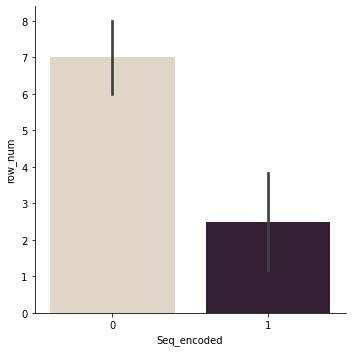

In [44]:
sns.catplot(x="Seq_encoded", y="row_num", kind="bar", palette="ch:.25", data=df_train)

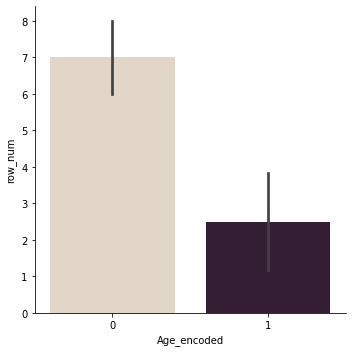

In [45]:
sns.catplot(x="Age_encoded", y="row_num", kind="bar", palette="ch:.25", data=df_train)

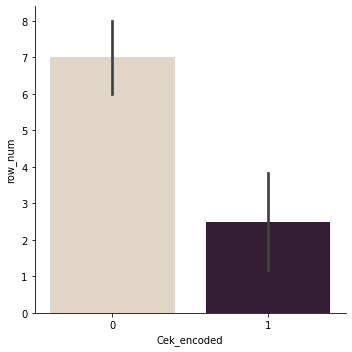

In [46]:
sns.catplot(x="Cek_encoded", y="row_num", kind="bar", palette="ch:.25", data=df_train)

<AxesSubplot:xlabel='Cek_encoded', ylabel='row_num'>

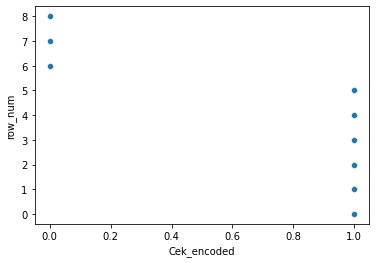

In [47]:
sns.scatterplot(x="Cek_encoded", y="row_num", palette="ch:.25", data=df_train)

In [48]:
X_train= df_train.drop(['Attack'],axis=1)
Y_train=df_train['Attack']
X_train

,row_num,Seq_encoded,Age_encoded,Cek_encoded,data_encoded
0,0,1,1,1,1
1,1,1,1,1,1
2,2,1,1,1,1
3,3,1,1,1,1
4,4,1,1,1,1
5,5,1,1,1,1
6,6,0,0,0,0
7,7,0,0,0,1
8,8,0,0,0,1


In [49]:
Y_train

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    0
Name: Attack, dtype: object

Heatmap

<AxesSubplot:title={'center':'Correlation matrix for features'}>

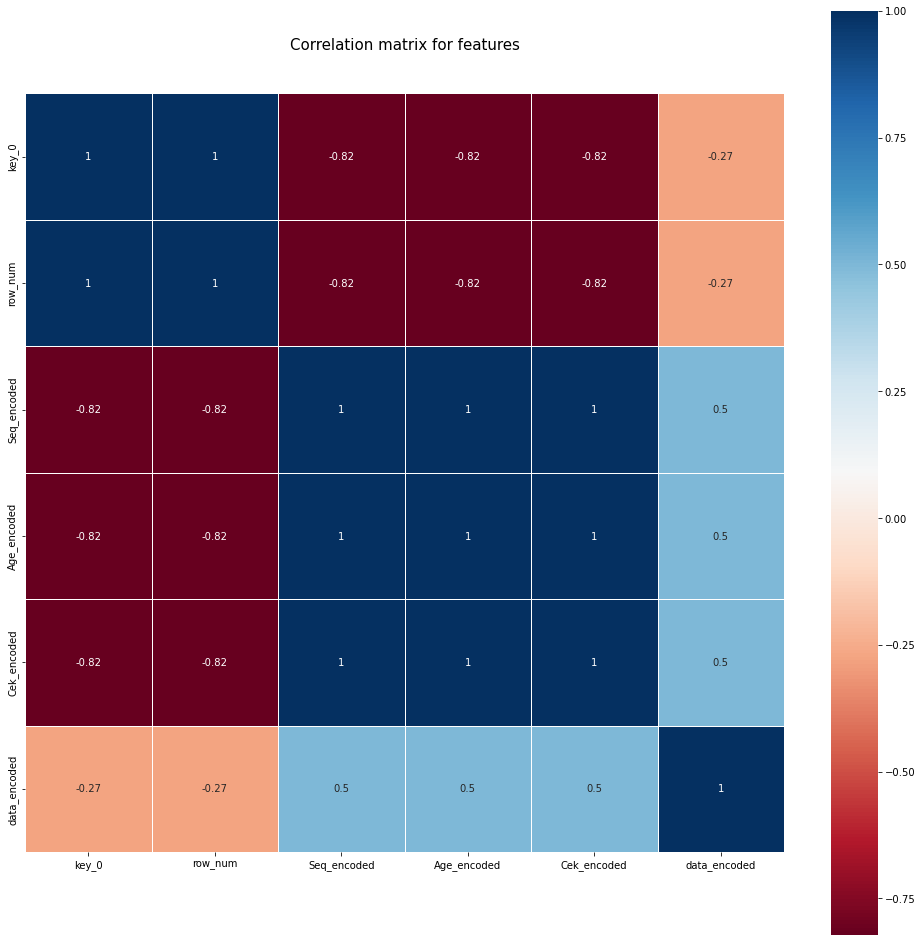

In [50]:
colormap = plt.cm.RdBu
plt.figure(figsize=(17,17))
plt.title('Correlation matrix for features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train, on=X_train['row_num']).corr(), linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:>

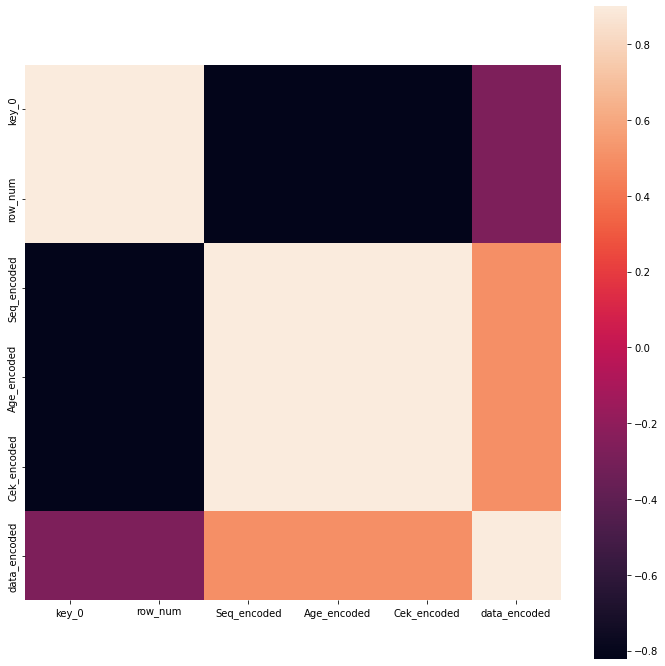

In [51]:
corr_mat = X_train.merge(Y_train, on=X_train['row_num']).corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr_mat, vmax=0.9, square=True)

In [52]:
X_train= X_train.drop(['row_num'],axis=1)
X_train

,Seq_encoded,Age_encoded,Cek_encoded,data_encoded
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,0,0,0,0
7,0,0,0,1
8,0,0,0,1


## Modelling

In [53]:
X_train

,Seq_encoded,Age_encoded,Cek_encoded,data_encoded
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,0,0,0,0
7,0,0,0,1
8,0,0,0,1


In [54]:
Y_train

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    0
Name: Attack, dtype: object

## Tree based model

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
y_pred_dtr=dtr.predict(df_test)

In [56]:
y_pred_dtr

array([1., 1., 1., 1., 1., 1., 0., 0., 0.])

In [57]:
from sklearn.model_selection import GridSearchCV
gs = DecisionTreeRegressor()
gs.fit(X_train, Y_train)
y_pred_gs=gs.predict(df_test)

In [58]:
y_pred_gs

array([1., 1., 1., 1., 1., 1., 0., 0., 0.])

In [60]:
from sklearn.metrics import mean_squared_error

In [62]:
mse_dtr = mean_squared_error(y_pred_gs,Y_train)
mse_dtr

0.0

In [ ]:
df.var()

In [ ]:
from matplotlib import style
style.use('ggplot')
x=df['SN']
y=df.columns.str.contains('/checksum')
sns.distplot(y)

In [ ]:
sns.scatterplot(y)

In [ ]:
ser=['/linkId','/checksum']
df.loc[:,df.columns.str.contains('|'.join(ser))]

In [ ]:
# Actual data not added(not attack)
df['Col'] = df['victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/ospfRouterLsa/routerLsaLinks/0/linkId'].map(str) + ' ' + df['victim/vrfs/default/instList/1/areas/0.0.0.0/areaDatabase/0/areaLsas/0/checksum'].map(str)

df['Col']= df['Col'].str.split(' ') 

df['Col'][4][1]


